In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

In [2]:
FA_iid_acc = [0.72663236, 0.78982, 0.82979763, 0.85621946, 0.87142097, 0.88131473, 0.88931591, 0.90024043, 0.90306516, 0.91149785, 0.91591979, 0.91968118, 0.92449064, 0.92574613,       0.92946495, 0.93176   , 0.93498484, 0.93521376, 0.93834237,       0.93927075, 0.9413714 , 0.94266054, 0.94310204, 0.94443742,       0.94450882, 0.94725226, 0.94664753, 0.94721979, 0.94831666, 0.94826708]
FA_iid_loss = [1.67877643, 1.53303261, 1.11283123, 0.80136914, 0.68226454, 0.60719681, 0.56775937, 0.49555764, 0.49069199, 0.43518651, 0.41113121, 0.39843818, 0.36927469, 0.37848811,       0.35668395, 0.34603854, 0.32504167, 0.32897919, 0.31571206,       0.31346068, 0.30125556, 0.29931619, 0.30376486, 0.29475074,       0.29732061, 0.28350311, 0.29061281, 0.2880856 , 0.28534405, 0.28555632]

c1A_acc = [0.35115583, 0.11706283, 0.18124633, 0.250594, 0.2953045 ,0.33917633, 0.37049367, 0.38637, 0.3888895, 0.39674183, 0.40799517, 0.4235625 , 0.413656  , 0.431112  , 0.438211  ,       0.4417355 , 0.448954  , 0.451287  , 0.46013133, 0.47228433,       0.461554  , 0.46513183, 0.4781365 , 0.49980133, 0.49377517,       0.48315933, 0.50810567, 0.50335817, 0.5127545 , 0.52776683]
c1A_loss = [127.68604474, 5.7014659, 11.77944371, 11.23832656, 11.27719006, 10.22435618, 8.48740097, 8.4523849, 8.39055237,   7.36409559,   8.06294507,   7.92717686,         7.97274969,   7.44404366,   6.81761597,   6.70635191,         6.62644315,   6.56557803,   6.20384951,   5.94279078,         5.75227081,   5.90942851,   5.88096625,   5.26709362,         5.32655352,   5.31512918,   5.55862248,   5.02411751,         4.83477324,   4.78799659]

c1B_acc = [0.099924, 0.10014667, 0.100141  , 0.09990967, 0.10058367, 0.100486  , 0.09947467, 0.099766, 0.09998667, 0.10009833,       0.09931733, 0.09946867, 0.10019567, 0.10034967, 0.10017867,       0.099618  , 0.099575  , 0.10005333, 0.10006733, 0.10062167,       0.100492  , 0.099909  , 0.10019333, 0.099104  , 0.09976633,       0.09999333, 0.099818, 0.100235, 0.099523  , 0.10088267]
c1B_loss = [893.24449076, 196.1460025,  42.00831606,  60.94805403, 36.5192242 ,  51.08924426,  32.69207403,  40.96123875, 35.3671446 ,  45.34425154,  35.21231617,  43.24698084,        41.15515909,  37.51229   ,  37.76534947,  36.98539247,        32.39394854,  40.41599372,  36.26085043,  42.55546667,        37.59146067,  41.40805827,  33.62067324,  40.72926628,        35.96705231,  38.72218523,  36.45188832,  37.70995521,        36.98322222,  35.5387728 ]

c2A_acc = [0.390421  , 0.42729483, 0.44045583, 0.43900933, 0.48375817, 0.52400983, 0.46010383, 0.488738, 0.52952433, 0.5029655, 0.53986683, 0.55875133, 0.5735705 , 0.6368985 , 0.660039, 0.62236533, 0.66179417, 0.69554833, 0.67727983, 0.7538585, 0.7931345 , 0.71494133, 0.75490817, 0.77748567, 0.664995, 0.66601133, 0.69529933, 0.7185635 , 0.730573  , 0.76149567]
c2A_loss = [35.74691642, 10.62352105, 12.56732725, 13.43685574,  7.21270959,        5.9903057 ,  6.11106692,  7.48004501,  5.55904367,  4.23122347,        6.38418969,  5.23194141,  5.09638907,  3.97388568,  3.14755518,        3.26346658,  3.0244778 ,  2.52956336,  2.68491038,  1.7412003 ,        1.47027612,  2.5228313 ,  2.04774092,  1.86684715,  2.62114377,        2.99598116,  2.70002203,  1.56140694,  2.31705878,  1.87456504]

c2B_acc = [0.098, 0.098, 0.098, 0.1135, 0.1135, 0.1135, 0.11348283, 0.10423184, 0.1032, 0.10508267, 0.10133   , 0.101     , 0.10102267, 0.10033617, 0.0982, 0.0952545 , 0.09133733, 0.0892    , 0.09186933, 0.0973325 , 0.09735183, 0.1       , 0.1017235 , 0.1028    , 0.10340633, 0.10193033, 0.09877467, 0.09758117, 0.1011415 , 0.10113934]
c2B_loss = [108.92099869, 105.22313538, 105.22313843, 1.46147366, 81.21517426, 80.6070343, 1.15067641,12.74748384, 35.17027468,   1.20232892,  11.70292918,  29.05000767,         1.19080487,   7.43489233,  21.41424695,   1.27124822,        14.31834147,  28.89954039,   1.29799686,   7.30369549,        17.20722815,   1.24637426,   8.76635334,  29.7506779 ,         1.35326111,   5.26558692,  17.17593162,   1.27297187,         4.81378025,  10.09133331]

c3A_acc = [0.39499933, 0.4162465 , 0.42543133, 0.42935383, 0.449018,0.50330017, 0.490738, 0.54492383, 0.57124767, 0.52754367,       0.57805017, 0.60223633, 0.58906483, 0.6236015 , 0.668078  ,       0.63450033, 0.65305467, 0.694452  , 0.64133033, 0.69374017,       0.74444283, 0.68000767, 0.7010285 , 0.72971633, 0.720973  ,       0.73949583, 0.78259383, 0.7754525 , 0.79100367, 0.819917  ]
c3A_loss = [38.62216063, 13.85963915, 15.06456663,  9.15530807, 12.15348279, 6.92631247,  6.28619016,  5.85887551,  4.93037054,  4.74458901,        5.58668356,  4.04190112,  3.59529786,  4.35310968,  2.93351395,        3.15269571,  3.52117411,  2.72014331,  2.93687705,  2.82818754,        1.95759787,  2.62980182,  2.83011801,  2.34079705,  2.00264682,        2.21735499,  1.73569132,  1.65153669,  1.61719991,  1.36103327]

c3B_acc = [0.10025   , 0.10025   , 0.10025   , 0.101122  , 0.101125, 0.101125  , 0.0993335 , 0.09876567, 0.09783   , 0.10313017,       0.0997985 , 0.100245  , 0.100332  , 0.09980933, 0.103809  ,       0.10064333, 0.09913983, 0.09918533, 0.09942167, 0.09818117,       0.09779   , 0.097561  , 0.10317517, 0.10217   , 0.10174767,       0.0990545 , 0.098535  , 0.09937483, 0.100158  , 0.10101   ]
c3B_loss = [284.91796844, 274.01516342, 274.01516266,  77.90074582, 165.20341905, 164.35085683,   6.43262965,  44.62464317,        83.02495375,  13.94224737,  47.94841461,  85.54314454,         5.44978044,  22.39512676,  65.24973402,   9.72900007,        32.51891701,  50.8364715 ,  16.80000104,  36.41786599,        58.3084313 ,   6.09142984,  23.3124965 ,  43.33349617,         6.26707273,  27.02225374,  47.47700422,  15.61651848,        25.16142736,  47.94829599]

In [3]:
len(FA_iid_acc), len(FA_iid_loss), len(c1A_acc), len(c1A_loss), len(c1B_acc), len(c1B_loss), len(c2A_acc), len(c2A_loss), len(c2B_acc), len(c2B_loss),  len(c3A_acc), len(c3A_loss), len(c3B_acc), len(c3B_loss) 

(30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30)

In [7]:
c3B_acc_std = [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.61555004e-05,       0.00000000e+00, 0.00000000e+00, 1.70367467e-05, 2.51210140e-03,       0.00000000e+00, 9.37849475e-04, 1.88480615e-05, 0.00000000e+00,       2.14000046e-04, 2.58527247e-04, 1.62735077e-03, 8.25354839e-04,       8.42109069e-04, 1.79508532e-06, 9.58310876e-04, 5.42885844e-06,       0.00000000e+00, 1.78137705e-03, 8.17274467e-04, 0.00000000e+00,       1.91959800e-03, 3.36863843e-04, 0.00000000e+00, 1.05864844e-03,       1.52752620e-03, 0.00000000e+00]
c3A_acc_std = [0.17657851, 0.1821557 , 0.20178058, 0.2043886 , 0.21563303,       0.20682957, 0.22108719, 0.20304472, 0.1937129 , 0.22538907,       0.20485402, 0.18392288, 0.2133674 , 0.18122129, 0.15876781,       0.19774383, 0.17941505, 0.16368358, 0.20268835, 0.16931498,       0.13263647, 0.20580017, 0.16815744, 0.15878699, 0.17325226,       0.15407577, 0.12325173, 0.14256614, 0.12154998, 0.1016218 ]
c2B_acc_std = [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,       0.00000000e+00, 0.00000000e+00, 9.24452892e-05, 9.87283553e-06,       0.00000000e+00, 6.79726907e-04, 0.00000000e+00, 0.00000000e+00,       7.11667743e-04, 2.09065939e-03, 0.00000000e+00, 1.52108188e-03,       2.81718913e-04, 0.00000000e+00, 4.15226166e-04, 5.31375464e-04,       4.37139988e-04, 2.95726790e-03, 1.69222000e-03, 0.00000000e+00,       1.81865069e-04, 2.07389341e-03, 1.34152082e-03, 1.07931378e-03,       2.67409797e-03, 1.59157915e-04]
c2A_acc_std = [0.17302761, 0.17748926, 0.19408488, 0.19444813, 0.1896443 ,       0.1757168 , 0.221244  , 0.22710018, 0.21106729, 0.22894791,       0.22640477, 0.21615448, 0.22964688, 0.19740847, 0.16462826,       0.22680253, 0.17371264, 0.15446813, 0.1825843 , 0.11637422,       0.09472427, 0.19232843, 0.1453023 , 0.12867772, 0.217448  ,       0.20327807, 0.19947964, 0.18330424, 0.16047556, 0.13703721]
c1B_acc_std = [0.00565813, 0.00524719, 0.00578371, 0.00531729, 0.00584407,       0.00576999, 0.00614176, 0.0055926 , 0.00572389, 0.00574724,       0.00590669, 0.00542497, 0.00615992, 0.00541481, 0.00597074,       0.00603845, 0.00578636, 0.00562   , 0.00586898, 0.00538031,       0.00583113, 0.00617959, 0.00582558, 0.00585072, 0.00555503,       0.00563639, 0.0058448 , 0.00575681, 0.00561842, 0.00585796]
c1A_acc_std = [0.14631829, 0.03810542, 0.08417913, 0.11214717, 0.13456112,       0.1446072 , 0.1503836 , 0.16171761, 0.16578977, 0.16609972,       0.17569527, 0.18318825, 0.1798641 , 0.17762806, 0.19075521,       0.18781056, 0.18903791, 0.19802133, 0.19429129, 0.19660555,       0.18627915, 0.20171047, 0.19057533, 0.19470563, 0.19858802,       0.19667877, 0.19866899, 0.19675367, 0.19282965, 0.18851281]
iid = [       0, 0.03888709, 0.03455188, 0.03469069, 0.03174858,       0.03194454, 0.03057482, 0.03116027, 0.02896813, 0.02873014,       0.02582178, 0.02553758, 0.02496444, 0.02307406, 0.02339449,       0.02085617, 0.02149617, 0.01882834, 0.01928541, 0.01863719,       0.01880717, 0.01714004, 0.01567667, 0.01783069, 0.01728105,       0.01650308, 0.01498042, 0.01546398, 0.0156145 , 0.01665256]

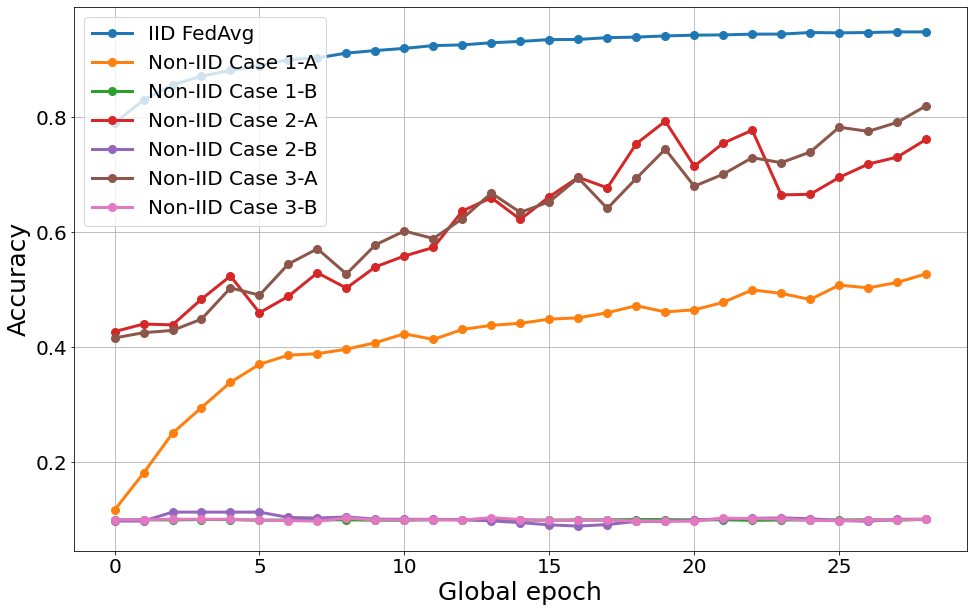

In [29]:
x = np.arange(0,29)
size = 8
plt.figure(figsize=(16,10))
plt.plot(FA_iid_acc[1:], label='IID FedAvg', linewidth=3, marker='o', markersize=size)
plt.plot(c1A_acc[1:], label='Non-IID Case 1-A', linewidth=3, marker='o', markersize=size)
plt.plot(c1B_acc[1:], label='Non-IID Case 1-B', linewidth=3, marker='o', markersize=size)
plt.plot(c2A_acc[1:], linewidth=3,  label='Non-IID Case 2-A', marker='o', markersize=size)
plt.plot(c2B_acc[1:], linewidth=3, label='Non-IID Case 2-B', marker='o', markersize=size)
plt.plot(c3A_acc[1:], linewidth=3, label='Non-IID Case 3-A', marker='o', markersize=size)
plt.plot(c3B_acc[1:], linewidth=3, label='Non-IID Case 3-B', marker='o', markersize=size)


plt.xlabel('Global epoch', fontsize=25)
plt.ylabel('Accuracy', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid(True)
plt.legend(fontsize=20)
plt.show()

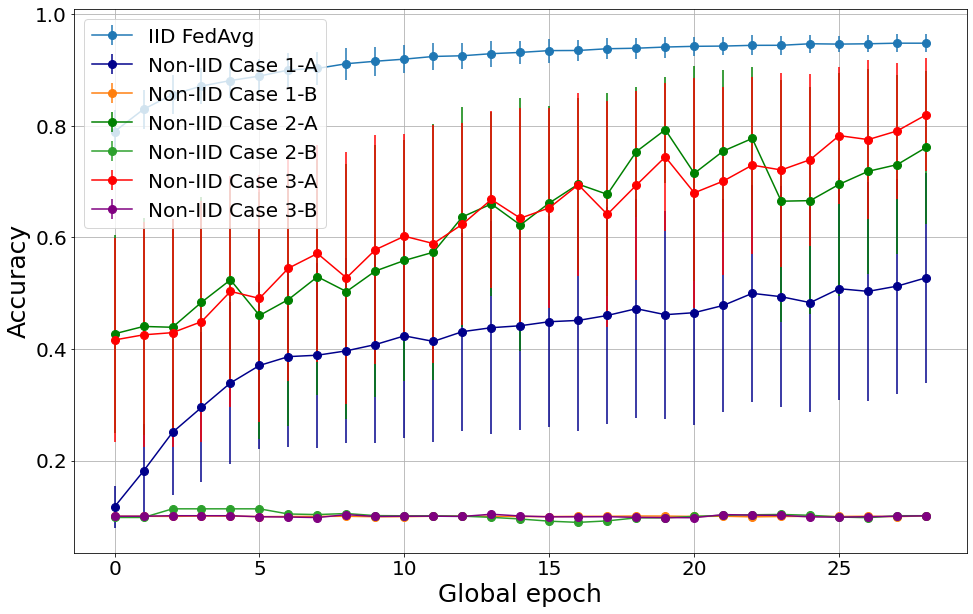

In [37]:
x = np.arange(0,29)
size = 8
plt.figure(figsize=(16,10))
plt.errorbar(x,FA_iid_acc[1:], yerr=iid[1:], label='IID FedAvg', marker='o', markersize=size)
plt.errorbar(x,c1A_acc[1:], yerr=c1A_acc_std[1:], label='Non-IID Case 1-A', marker='o', markersize=size, c='darkblue')
plt.errorbar(x,c1B_acc[1:], yerr=c1B_acc_std[1:], label='Non-IID Case 1-B', marker='o', markersize=size)
plt.errorbar(x,c2A_acc[1:], yerr=c2A_acc_std[1:], label='Non-IID Case 2-A', marker='o', markersize=size,c='green')
plt.errorbar(x,c2B_acc[1:], yerr=c2B_acc_std[1:], label='Non-IID Case 2-B', marker='o', markersize=size)
plt.errorbar(x,c3A_acc[1:], yerr=c3A_acc_std[1:], label='Non-IID Case 3-A', marker='o', markersize=size, c='red')
plt.errorbar(x,c3B_acc[1:], yerr=c3B_acc_std[1:], label='Non-IID Case 3-B', marker='o', markersize=size, c='purple')

plt.xlabel('Global epoch', fontsize=25)
plt.ylabel('Accuracy', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid(True)
plt.legend(fontsize=20)
plt.show()

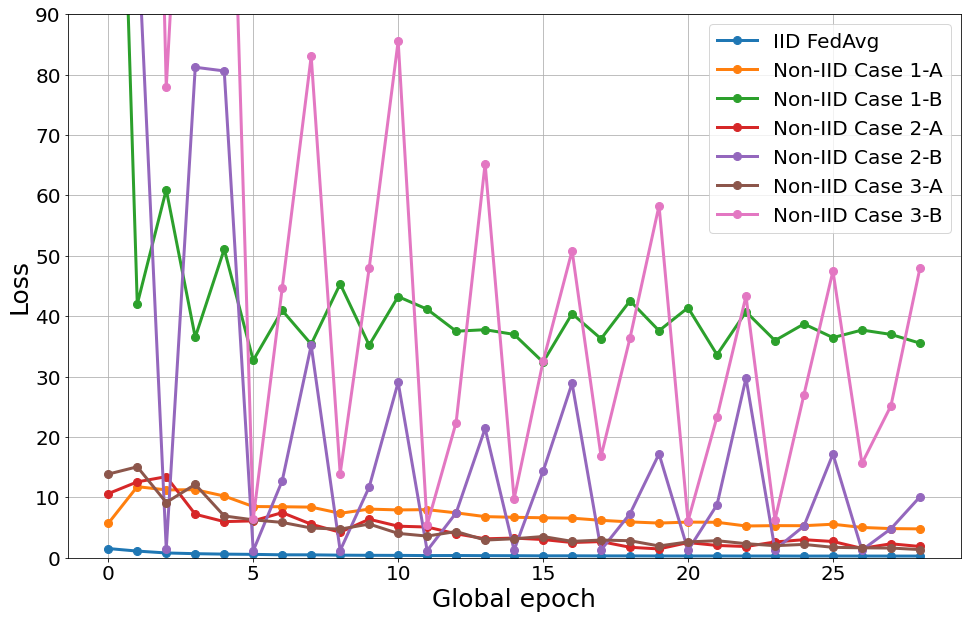

In [5]:
plt.figure(figsize=(16,10))
plt.plot(FA_iid_loss[1:], label='IID FedAvg', linewidth=3, marker='o', markersize=size)
plt.plot(c1A_loss[1:], label='Non-IID Case 1-A', linewidth=3, marker='o', markersize=size)
plt.plot(c1B_loss[1:], label='Non-IID Case 1-B', linewidth=3, marker='o', markersize=size)
plt.plot(c2A_loss[1:], label='Non-IID Case 2-A', linewidth=3, marker='o', markersize=size)
plt.plot(c2B_loss[1:], label='Non-IID Case 2-B', linewidth=3, marker='o', markersize=size)
plt.plot(c3A_loss[1:], label='Non-IID Case 3-A', linewidth=3, marker='o', markersize=size)
plt.plot(c3B_loss[1:], label='Non-IID Case 3-B', linewidth=3, marker='o', markersize=size)
plt.xlabel('Global epoch', fontsize=25)
plt.ylabel('Loss', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,90)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

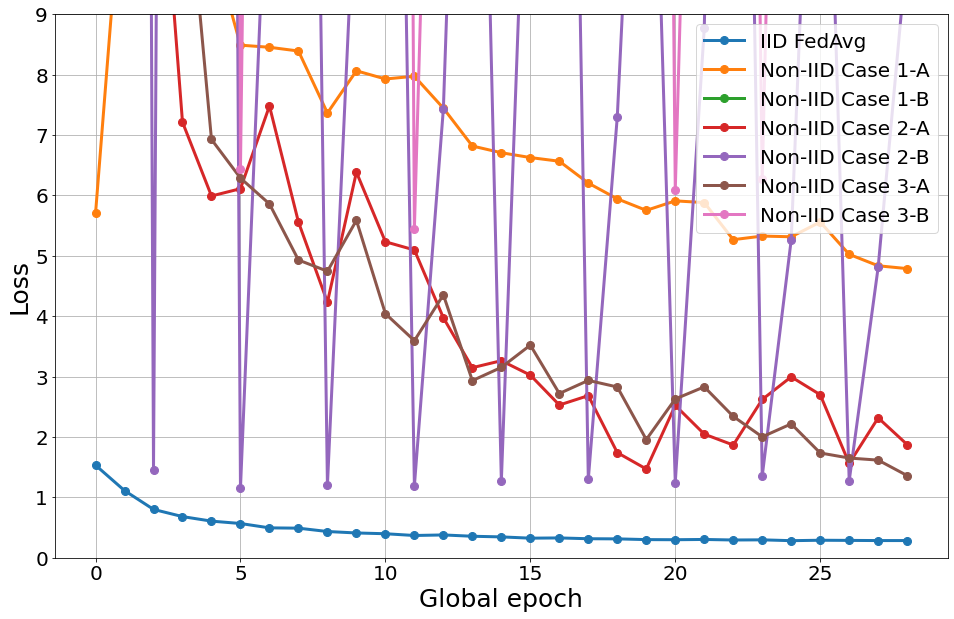

In [6]:
plt.figure(figsize=(16,10))
plt.plot(FA_iid_loss[1:], label='IID FedAvg', linewidth=3, marker='o', markersize=size)
plt.plot(c1A_loss[1:], label='Non-IID Case 1-A', linewidth=3, marker='o', markersize=size)
plt.plot(c1B_loss[1:], label='Non-IID Case 1-B', linewidth=3, marker='o', markersize=size)
plt.plot(c2A_loss[1:], label='Non-IID Case 2-A', linewidth=3, marker='o', markersize=size)
plt.plot(c2B_loss[1:], label='Non-IID Case 2-B', linewidth=3, marker='o', markersize=size)
plt.plot(c3A_loss[1:], label='Non-IID Case 3-A', linewidth=3, marker='o', markersize=size)
plt.plot(c3B_loss[1:], label='Non-IID Case 3-B', linewidth=3, marker='o', markersize=size)
plt.xlabel('Global epoch', fontsize=25)
plt.ylabel('Loss', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,9)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()